##  <b>Plant Seedling Classification

### **Context:**

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.




### **Objective:**

The aim of this project is to **Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.**


### **Data Description:**
The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Label.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet




####**Note: Please use GPU runtime to execute the code efficiently** 


### Importing necessary libraries

In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adamax                                  # Importing the optimizers which can be used in our model
from tensorflow.keras.callbacks import EarlyStopping                                             #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint                    
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Mounting drive

In [ ]:
# Mount Google drive to access the dataset (monkeys_dataset.zip)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Read the dataset

In [ ]:
# Load the image file of the dataset
images = np.load('/content/drive/MyDrive/AIML/Computer_Vision/images.npy')

# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/MyDrive/AIML/Computer_Vision/Labels.csv')

### Data Overview

- Check the shape of images and the labels in the data
- Converting images from BGR to RGB

#### Checking the shape of the dataset

In [ ]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


#### Converting the BGR images to RGB images.

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

### Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better. 
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

In [ ]:
def plot_images(images,labels):
  num_classes=12                                                                  # Number of Classes
  categories=np.unique(labels)   
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image 
          ax.set_title(keys[random_index])
  plt.show()

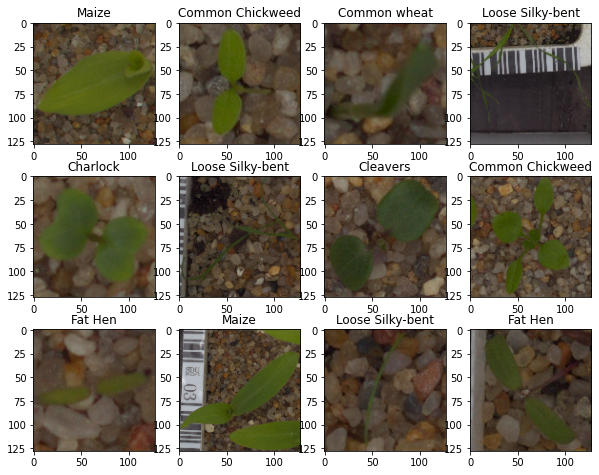

In [ ]:
plot_images(images,labels)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

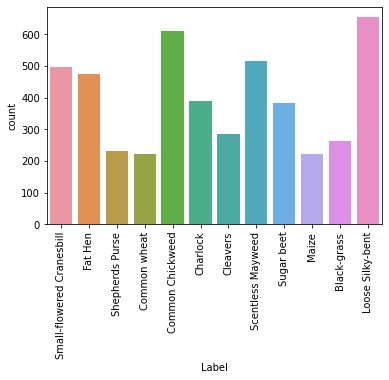

In [ ]:
sns.countplot(labels['Label'])
plt.xticks(rotation='vertical')

### Resizing images 
As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)  
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

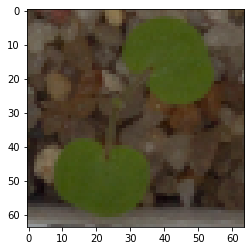

In [ ]:
plt.imshow(images_decreased[4])

In [ ]:



images_LAB = []
for i in range(len(images)): 
    images_LAB.append(cv2.cvtColor(images[i], cv2.COLOR_RGB2LAB))

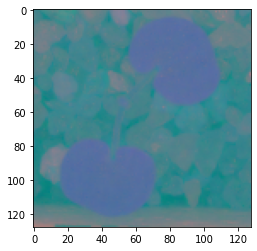

In [ ]:
plt.imshow(images_LAB[4])

In [ ]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images_decreased)):
  # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  images_gb.append(cv2.medianBlur(images_decreased[i],3))

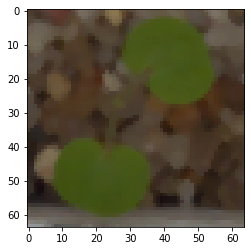

In [ ]:
plt.imshow(images_gb[4])

### Data Preparation for modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

#### Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


#### Encoding the target labels

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
y_train_encoded_lab = pd.DataFrame(enc.fit_transform(y_train))
y_val_encoded_lab=pd.DataFrame(enc.transform(y_val))
y_test_encoded_lab=pd.DataFrame(enc.transform(y_test))

#### Data Normalization (Scaling)

In [ ]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

In [ ]:
from sklearn.utils import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train_encoded_lab ),
                                        y = y_train_encoded_lab                                                     
                                    )
class_weights = dict(zip(np.unique(y_train_encoded_lab ), class_weights))
class_weights

{0.0: 1.5050860719874803,
 1.0: 1.0145042194092826,
 2.0: 1.3818247126436782,
 3.0: 0.6476430976430977,
 4.0: 1.7909683426443204,
 5.0: 0.8348524305555556,
 6.0: 0.604874213836478,
 7.0: 1.7909683426443204,
 8.0: 0.7669457735247209,
 9.0: 1.714349376114082,
 10.0: 0.7974709784411277,
 11.0: 1.0275106837606838}

In [ ]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder 

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train_encoded_lab)
y_val_encoded=enc.transform(y_val_encoded_lab)
y_test_encoded=enc.transform(y_test_encoded_lab)

### Model Building - Convolutional Neural Network (CNN)


First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data. 

In Keras, we need a special command to clear the model's history, otherwise the previous model history remains in the backend.

Also, let's fix the seed again after clearing the backend.

Let's **set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow** to be able to reproduce the same results every time we run the code.



#### Clearing the backend session and initializing the random seed values

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### Model Buidling (CNN)

In [ ]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 1)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(124, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(62, activation='relu'))
#model.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
#opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])



#### Summary of the model

In [ ]:
# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 124)               1

#### Fitting the model on the train data

In [ ]:
history_1 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=40,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2,
)

Epoch 1/40
121/121 - 2s - loss: 2.4322 - accuracy: 0.1344 - val_loss: 2.4209 - val_accuracy: 0.1379 - 2s/epoch - 13ms/step
Epoch 2/40
121/121 - 1s - loss: 2.4023 - accuracy: 0.1458 - val_loss: 2.4000 - val_accuracy: 0.1519 - 807ms/epoch - 7ms/step
Epoch 3/40
121/121 - 1s - loss: 2.3361 - accuracy: 0.1630 - val_loss: 2.2711 - val_accuracy: 0.2243 - 786ms/epoch - 6ms/step
Epoch 4/40
121/121 - 1s - loss: 2.2641 - accuracy: 0.2012 - val_loss: 2.2199 - val_accuracy: 0.2220 - 784ms/epoch - 6ms/step
Epoch 5/40
121/121 - 1s - loss: 2.1063 - accuracy: 0.2654 - val_loss: 2.1632 - val_accuracy: 0.2173 - 788ms/epoch - 7ms/step
Epoch 6/40
121/121 - 1s - loss: 1.8396 - accuracy: 0.3754 - val_loss: 1.8368 - val_accuracy: 0.4065 - 791ms/epoch - 7ms/step
Epoch 7/40
121/121 - 1s - loss: 1.4859 - accuracy: 0.4926 - val_loss: 1.6900 - val_accuracy: 0.4439 - 769ms/epoch - 6ms/step
Epoch 8/40
121/121 - 1s - loss: 1.2140 - accuracy: 0.5890 - val_loss: 1.6302 - val_accuracy: 0.4182 - 765ms/epoch - 6ms/step
Ep

#### Model Evaluation

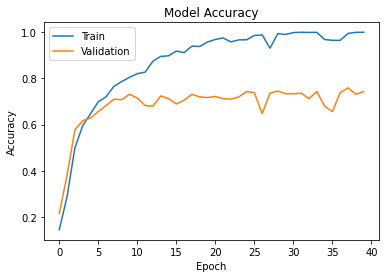

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:** 

* The model overfit on the training data
* The training accury is good but not the validation accuracy

#### Evaluating the model on test data

In [ ]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 3.1598 - accuracy: 0.6611 - 79ms/epoch - 5ms/step


#### Plot the Confusion Matrix





*   The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
*   The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
*   We will use the `argmax()` function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.





In [ ]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)
y_pred


15/15 [==============================] - 0s 3ms/step


array([[1.8845019e-20, 8.8996524e-21, 2.0241148e-19, ..., 2.2298025e-12,
        1.3757766e-15, 5.4019976e-11],
       [7.1598203e-32, 1.0540576e-05, 1.0513775e-06, ..., 7.0471532e-07,
        9.9998772e-01, 1.6326089e-09],
       [2.8037587e-16, 2.4518858e-06, 6.9496922e-11, ..., 7.0992814e-06,
        9.9998987e-01, 7.6083753e-09],
       ...,
       [8.5953909e-01, 6.1197214e-11, 1.7653897e-11, ..., 2.3278684e-21,
        1.5271247e-14, 3.4859992e-12],
       [5.3940657e-16, 2.6859075e-12, 1.7294636e-06, ..., 8.4184423e-05,
        3.8841907e-09, 8.2499919e-06],
       [3.6527514e-20, 4.7136228e-09, 2.7730939e-04, ..., 8.3235687e-01,
        1.5991069e-01, 4.4795477e-05]], dtype=float32)

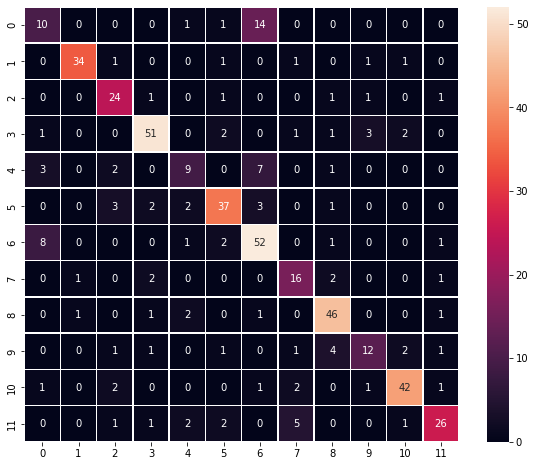

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Observations**:

* It can be observed that some of the classes are not predicted correctly. 
* 6 is the most misclassified 
* 1,2 and 7 are well classified


#### Plot Classification Report





In [ ]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test_arg,y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.43      0.38      0.41        26
           1       0.94      0.87      0.91        39
           2       0.71      0.83      0.76        29
           3       0.86      0.84      0.85        61
           4       0.53      0.41      0.46        22
           5       0.79      0.77      0.78        48
           6       0.67      0.80      0.73        65
           7       0.62      0.73      0.67        22
           8       0.81      0.88      0.84        52
           9       0.67      0.52      0.59        23
          10       0.88      0.84      0.86        50
          11       0.81      0.68      0.74        38

    accuracy                           0.76       475
   macro avg       0.73      0.71      0.72       475
weighted avg       0.76      0.76      0.75       475



**Observations**:

* The model correctly identified class 8 at 87% and class 2 at 86%
* The least correctly identified class is 0 (42%) and class 9 (43%)

### Deleting the model and history variable to use the RAM efficiently

# **Improving the Base Model using Data Augmentation and Regularization**




**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

### **Data Augmentation**


Remember, **data augmentation should not be used in the validation/test data set**.

#### Clearing the backend session and initializing the random seed values

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### Model Buidling - 2

In [ ]:
# Create an ImageDataGenerator object
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Select the class you want to augment
class_idx = np.where(y_train_encoded == 2)[0]

# Apply data augmentation only to the selected class
x_augmented = datagen.flow(X_train_normalized[class_idx], y_train_encoded[class_idx], batch_size=32)

# Combine the augmented data with the original data
X_train_normalized = np.concatenate((X_train_normalized, x_augmented), axis=0)

In [ ]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
                              horizontal_flip = True,
                              vertical_flip = False, 
                              height_shift_range= 0.1, 
                              width_shift_range=0.1, 
                              rotation_range=20, 
                              shear_range = 0.1,
                              fill_mode='reflect',
                              zoom_range=0.1)

In [ ]:
reduce_lr =keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=2, min_lr=0.000001)
#adding earlystopping callback
es=keras.callbacks.EarlyStopping(monitor='val_accuracy',
                              min_delta=0.01,
                              patience=9,
                             verbose=1, mode='auto')
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(BatchNormalization())
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(600, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.2))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
#opt = SGD(learning_rate=0.001, momentum=0.9)
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                        

#### Fitting the model on the train data

In [ ]:
# Epochs
epochs = 100
# Batch size
batch_size = 32

history = model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),  
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1,callbacks=[reduce_lr,es,mc])

Epoch 1/100
119/120 [============================>.] - ETA: 0s - loss: 2.1361 - accuracy: 0.3603
Epoch 1: val_accuracy improved from -inf to 0.05140, saving model to best_model.h5
120/120 [==============================] - 6s 46ms/step - loss: 2.1329 - accuracy: 0.3609 - val_loss: 4.3056 - val_accuracy: 0.0514 - lr: 0.0010
Epoch 2/100
120/120 [==============================] - ETA: 0s - loss: 1.4615 - accuracy: 0.5080
Epoch 2: val_accuracy did not improve from 0.05140
120/120 [==============================] - 5s 42ms/step - loss: 1.4615 - accuracy: 0.5080 - val_loss: 8.6197 - val_accuracy: 0.0467 - lr: 0.0010
Epoch 3/100
119/120 [============================>.] - ETA: 0s - loss: 1.2535 - accuracy: 0.5741
Epoch 3: val_accuracy did not improve from 0.05140
120/120 [==============================] - 5s 42ms/step - loss: 1.2547 - accuracy: 0.5746 - val_loss: 8.6051 - val_accuracy: 0.0491 - lr: 0.0010
Epoch 4/100
120/120 [==============================] - ETA: 0s - loss: 0.9470 - accuracy:

#### Model Evaluation

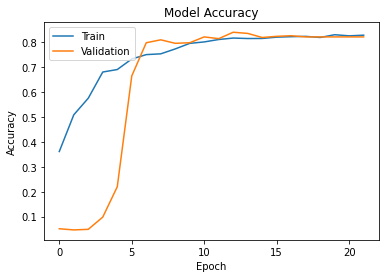

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Evaluating the model on test data

In [ ]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.5713 - accuracy: 0.8126 - 150ms/epoch - 10ms/step


#### Plotting the Confusion Matrix

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)
y_pred

15/15 [==============================] - 0s 3ms/step


array([[9.95180827e-10, 1.55975996e-11, 1.04948016e-12, ...,
        2.13226986e-06, 2.89206925e-09, 2.55488821e-08],
       [2.89269977e-08, 5.71882762e-02, 7.13963993e-04, ...,
        4.45250683e-02, 8.83254230e-01, 4.04121420e-05],
       [8.31950153e-09, 5.69061027e-04, 1.20580844e-04, ...,
        2.65379599e-03, 9.95423734e-01, 5.82238226e-06],
       ...,
       [3.68497908e-01, 8.69566534e-08, 1.87097953e-06, ...,
        3.84287432e-07, 4.17968295e-07, 3.19615574e-05],
       [6.86515763e-04, 6.37880117e-02, 4.54178415e-02, ...,
        2.74632007e-01, 4.66788113e-02, 3.12579237e-02],
       [1.65030535e-04, 3.37443858e-01, 1.10994922e-02, ...,
        3.94969612e-01, 2.02814281e-01, 3.10018752e-02]], dtype=float32)

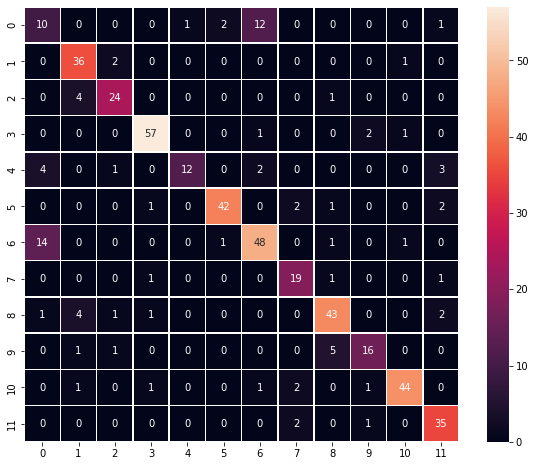

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Observation:**

* Augmentation technique has increase the performance of the model
* Class 6 is now better classified


#### Plot Classification Report

In [ ]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test_arg,y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.34      0.38      0.36        26
           1       0.78      0.92      0.85        39
           2       0.83      0.83      0.83        29
           3       0.93      0.93      0.93        61
           4       0.92      0.55      0.69        22
           5       0.93      0.88      0.90        48
           6       0.75      0.74      0.74        65
           7       0.76      0.86      0.81        22
           8       0.83      0.83      0.83        52
           9       0.80      0.70      0.74        23
          10       0.94      0.88      0.91        50
          11       0.80      0.92      0.85        38

    accuracy                           0.81       475
   macro avg       0.80      0.78      0.79       475
weighted avg       0.82      0.81      0.81       475



**Observations**:

* The model correctly identified class 7 at 100% and class 3 at 97%
* The least correctly identified class is 0 (35%)

### Visualizing the prediction

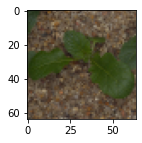

1/1 [==============================] - 0s 78ms/step
Predicted Label [1.]
True Label 1.0


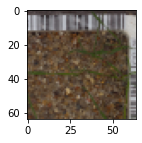

1/1 [==============================] - 0s 18ms/step
Predicted Label [0.]
True Label 6.0


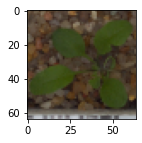

1/1 [==============================] - 0s 23ms/step
Predicted Label [9.]
True Label 9.0


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[15])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[15].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[15])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[35])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[35].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[35])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[55])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[55].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[55])     

**Observations**


## Conclusion

- We can observe from the confusion matrix of the 2 the models the model with Data Augmentation was the best model because it predicted the majority of the classes better than the other model.
- The test accuracy of the best model is 87%.
- Data Augmentation has helped in improving the model.

# **Happy Learning!**